Цель проекта: оценить влияние условий жизни ученика на его итоговую оценку по математике и подготовить данные для модели предсказания оценки ученика 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

study = pd.read_csv('stud_math.csv')

In [2]:
# функция для построение боксплота
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=study.loc[study.loc[:, column].isin(study.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
# функция для коэффициента Стьюдента    
def get_stat_dif(column):
    cols = study.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'], 
                        study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            

In [3]:
display( study.head(10))
study.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# Переименуем колонки для удобства работы
study.rename(columns = {'Pstatus': 'pstatus','Fedu' : 'fedu', 'Medu' : 'medu', 'Mjob' : 'mjob', 'Fjob' : 'fjob', 'studytime, granular' : 'granular'}, inplace = True)

In [5]:
study.drop(['granular'], inplace = True, axis = 1) #Удалим колонку "granular", т.к. она полностью коррелирует с колонкой "studytime"

In [6]:
display( study.head(10))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [7]:
pd.DataFrame(study.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


В датасете всего двое учеников с отцами без образования, остальные по уровню образования распределены почти равномерно

In [8]:
study.fedu = study.fedu.apply(lambda x: 4 if x == 40 else x) # заменяем 40 на 4, считая это опечаткой

In [9]:
pd.DataFrame(study.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [10]:
study.famrel = study.famrel.apply(lambda x: 1 if x == -1 else x) # заменяем -1 на 1, считая это опечаткой

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

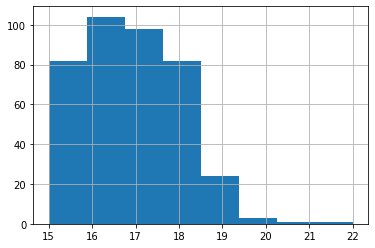

In [11]:
study.age.hist(bins = 8)
study.age.describe()

3/4 учеников в возрасте 18 лет и младше 

,medu
4.0,101
2.0,70
3.0,65
1.0,39
0.0,3


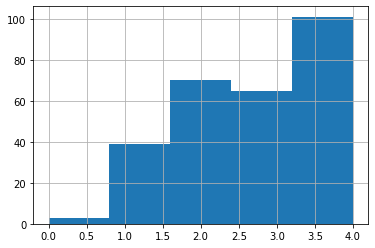

In [54]:
study.medu.hist(bins = 5)
study.medu.describe()

Больше всего матерей имеют высшее образование, также матерей с высшим образованием существенно больше, чем отцов с высшим образованием

,fedu
2.0,74
3.0,70
4.0,61
1.0,55
0.0,2


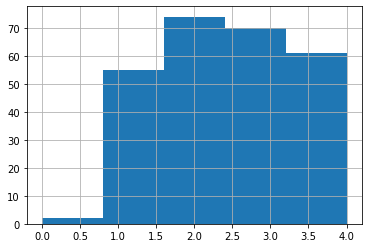

In [55]:
study.fedu.hist(bins = 5)
study.fedu.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

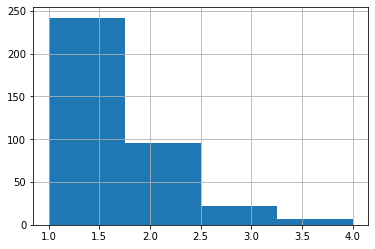

In [14]:
study.traveltime.hist(bins = 4)
study.traveltime.describe()

Большая часть учеников живет близко от школы

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

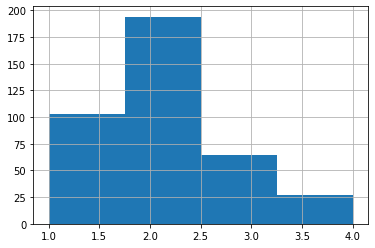

In [15]:
study.studytime.hist(bins = 4)
study.studytime.describe()

Основная часть учеников уделяет учебе вне школы меньше 5 часов

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

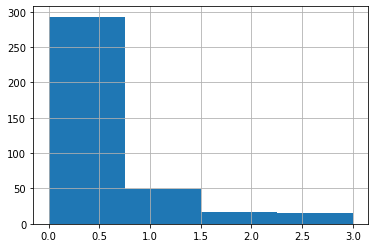

In [16]:
study.failures.hist(bins = 4)
study.failures.describe()

У основной части учеников нет внеучебных неудач

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

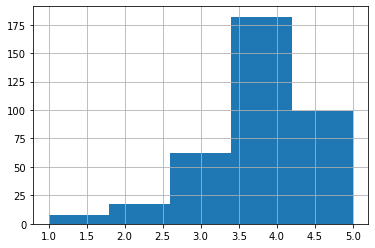

In [17]:
study.famrel.hist(bins = 5)
study.famrel.describe()

У основной части учеников отношения в семье хорошие, учеников с плохими отношениями мало

count    276.000000
mean       3.224638
std        0.976212
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

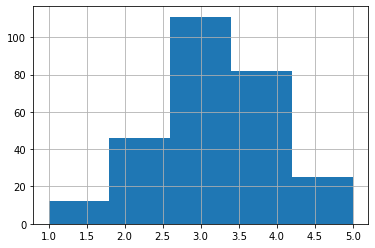

In [56]:
study.freetime.hist(bins = 5)
study.freetime.describe()

Свободное время у учеников есть, но у основной части не очень много

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

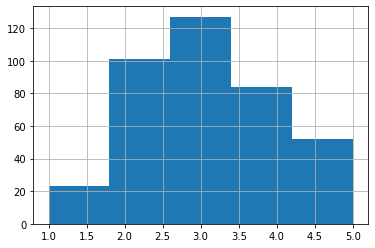

In [19]:
study.goout.hist(bins = 5)
study.goout.describe()

Учеников, проводящих мало времени с друзьями немного

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

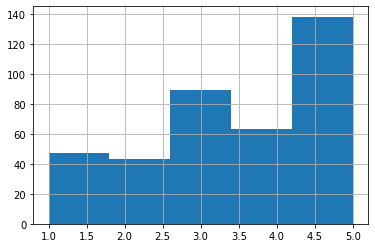

In [20]:
study.health.hist(bins = 5)
study.health.describe()

Больше всего среди учеников детей с очень хорошим здоровьем

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

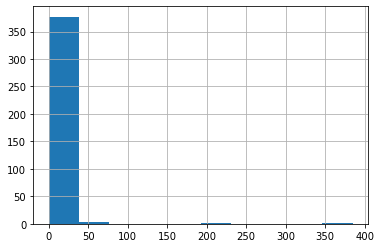

In [21]:
study.absences.hist()
study.absences.describe()

Ученики почти не пропускают занятия

In [23]:
IQR_abs = study.absences.quantile(0.75) - study.absences.quantile(0.25)
print('верхняя граница выбросов ', 1.5*IQR_abs)

верхняя граница выбросов  12.0


In [24]:
study = study.loc[study.absences <= 12]

count    327.000000
mean      52.415902
std       23.640420
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

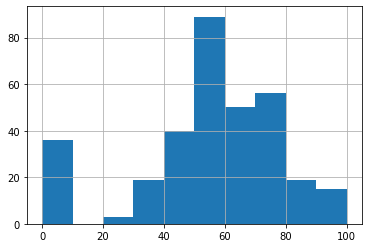

In [25]:
study.score.hist()
study.score.describe()

Половина учеников сдала экзамен по математике в диапазоне от 45 до 70 баллов

In [26]:
study.score = study.score.apply( lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' # ноль, пустые значения и "nan" будем считать за 0
                      else x)
study_0 = study.loc[study.score == 0] # нулевые значения или непришедшие на экзамен
study = study.loc[study.score > 0]

In [27]:
pd.DataFrame(study.school.value_counts())

,school
GP,255
MS,36


Почти 90% учеников в датасете из одной школы

In [28]:
pd.DataFrame(study.sex.value_counts())

,sex
F,150
M,141


Мальчиков и девочек примерно одинаковое количество

In [29]:
study.address = study.address.apply( lambda x: 'U' if pd.isnull(x) else 'U' if x == 'nan' else x) # заменим пустые строки на 'U'
pd.DataFrame(study.address.value_counts()) # Будем считать, что если нет данных, то ученик живет в городе

,address
U,229
R,62


Т.к. основная часть учеников живет в большой семье, будем считать, что если нет данных, то ученик также живет в большой семье

In [30]:
study.famsize = study.famsize.apply( lambda x: 'GT3' if pd.isnull(x) else 'GT3' if x == 'nan' else x) # заменим пустые строки на 'GT3'
pd.DataFrame(study.famsize.value_counts())

,famsize
GT3,208
LE3,83


Т.к. основная чать учеников живет в полной семье, будем считать, что если нет данных, то ученик также живет в полной семье

In [31]:
study.pstatus = study.pstatus.apply( lambda x: 'T' if pd.isnull(x) else 'T' if x == 'nan' else x) # заменим пустые строки на 'T'
pd.DataFrame(study.pstatus.value_counts())

,pstatus
T,265
A,26


Будем считать, что если нет данных, то место работы родителей "другое", т.к. таких родителей больше всего и это больше всего подходит 

In [32]:
study.mjob = study.mjob.apply( lambda x: 'other' if pd.isnull(x) else 'other' if x == 'nan' else x) # заменим пустые строки на 'other'
pd.DataFrame(study.mjob.value_counts())

,mjob
other,110
services,70
teacher,45
at_home,41
health,25


In [33]:
study.fjob = study.fjob.apply( lambda x: 'other' if pd.isnull(x) else 'other' if x == 'nan' else x) # заменим пустые строки на 'other'
pd.DataFrame(study.fjob.value_counts())

,fjob
other,173
services,74
teacher,20
at_home,14
health,10


Основная часть выбрала школу из-за образовательной программы, будем считать, что если нет данных, то причина выбора школы "другое",т.к. мы не знаем настоящую причину

In [34]:
study.reason = study.reason.apply( lambda x: 'other' if pd.isnull(x) else 'other' if x == 'nan' else x) # заменим пустые строки на 'other'
pd.DataFrame(study.reason.value_counts())

,reason
course,104
reputation,78
home,68
other,41


Будем считать, что если нет данных, то опекун - мать, т.к. больше всего опекунов мамы

In [35]:
study.guardian = study.guardian.apply( lambda x: 'mother' if pd.isnull(x) else 'mother' if x == 'nan' else x) # заменим пустые строки на 'mother'
pd.DataFrame(study.guardian.value_counts())

,guardian
mother,210
father,68
other,13


Будем считать, что если нет данных, то дополнительной образовательной поддержки нет, т.к. ее нет у основной части ее также нет

In [36]:
study.schoolsup = study.schoolsup.apply( lambda x: 'no' if pd.isnull(x) else 'no' if x == 'nan' else x) # заменим пустые строки на 'no'
pd.DataFrame(study.schoolsup.value_counts())

,schoolsup
no,253
yes,38


Т.к. у основной части учеников семейная образовательная поддержка есть, будем считать, что если нет данных, то она тоже есть

In [37]:
study.famsup = study.famsup.apply( lambda x: 'yes' if pd.isnull(x) else 'yes' if x == 'nan' else x) # заменим пустые строки на 'yes'
pd.DataFrame(study.famsup.value_counts())

,famsup
yes,190
no,101


Больше половины учеников обходится без дополнительных занятий по математике, поэтому будем считать, что если нет данных, то дополнительных занятий по математике нет

In [38]:
study.paid = study.paid.apply( lambda x:'no' if pd.isnull(x) else 'no' if x == 'nan' else x) # заменим пустые строки на 'no'
pd.DataFrame(study.paid.value_counts())

,paid
no,169
yes,122


Количество учеников без дополнительных занятий примерно равно количеству учеников с ними, удалим строки, в которых нет данных

In [39]:
study.dropna(subset=['activities'], inplace=True)
pd.DataFrame(study.activities.value_counts())

,activities
yes,145
no,135


Большая часть детей посещала детский сад, поэтому если нет данных, будем считать что ученик в него ходил

In [57]:
study.nursery = study.nursery.apply( lambda x:'yes' if pd.isnull(x) else 'yes' if x == 'nan' else x)
pd.DataFrame(study.nursery.value_counts())

,nursery
yes,226
no,54


Почти все ученики хотят получить высшее образование, поэтому будем считать, что если нет данных, то ученик хочет получить высшее образование

In [41]:
study.higher = study.higher.apply( lambda x: 'yes' if pd.isnull(x) else 'yes' if x == 'nan' else x) # заменим пустые строки на 'yes'
pd.DataFrame(study.higher.value_counts())

,higher
yes,273
no,7


Почти у всех семей есть интернет дома, будем считать, что если нет данных, то интернет у ученика есть

In [42]:
study.internet = study.internet.apply( lambda x: 'yes' if pd.isnull(x) else 'yes' if x == 'nan' else x) # заменим пустые строки на 'yes'
pd.DataFrame(study.internet.value_counts())

,internet
yes,235
no,45


Почти 3/4 учеников не состоят в романтических отношениях, будем считать, что если нет данных, то романтических отношений нет

In [43]:
study.romantic = study.romantic.apply( lambda x: 'no' if pd.isnull(x) else 'no' if x == 'nan' else x) # заменим пустые строки на 'no'
pd.DataFrame(study.romantic.value_counts())

,romantic
no,204
yes,76


In [44]:
# Попробуем заменить пропуски в числовых данных на медианное значение
#study.age = study.age.apply( lambda x: study.age.median() if pd.isnull(x) else study.age.median() if x == 'nan' else x)
#study.medu = study.medu.apply( lambda x: study.medu.median() if pd.isnull(x) else study.medu.median() if x == 'nan' else x)
#study.fedu = study.fedu.apply( lambda x: study.fedu.median() if pd.isnull(x) else study.fedu.median() if x == 'nan' else x)
#study.traveltime = study.traveltime.apply( lambda x: study.traveltime.median() if pd.isnull(x) else study.traveltime.median() if x == 'nan' else x)
#study.studytime = study.studytime.apply( lambda x: study.studytime.median() if pd.isnull(x) else study.studytime.median() if x == 'nan' else x)
#study.failures = study.failures.apply( lambda x: study.failures.median() if pd.isnull(x) else study.failures.median() if x == 'nan' else x)
#study.famrel = study.famrel.apply( lambda x: study.famrel.median() if pd.isnull(x) else study.famrel.median() if x == 'nan' else x)
#study.freetime = study.freetime.apply( lambda x: study.freetime.median() if pd.isnull(x) else study.freetime.median() if x == 'nan' else x)
#study.goout = study.goout.apply( lambda x: study.goout.median() if pd.isnull(x) else study.goout.median() if x == 'nan' else x)
#study.health = study.health.apply( lambda x: study.health.median() if pd.isnull(x) else study.health.median() if x == 'nan' else x)
#study.absences = study.absences.apply( lambda x: study.absences.median() if pd.isnull(x) else study.absences.median() if x == 'nan' else x)

Заполнять пропуски в числовых данных не будем, чтобы не будем, т.к. почти ничего не меняется

In [45]:
study.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.152172,-0.109618,0.096434,0.028449,0.133055,0.050037,0.011470,0.119335,-0.040059,0.119528,-0.109054
medu,-0.152172,1.000000,0.613903,-0.184776,0.081500,-0.227822,0.006276,0.021332,-0.000601,-0.058753,0.064577,0.207971
fedu,-0.109618,0.613903,1.000000,-0.123518,-0.035586,-0.291150,-0.008580,0.010449,-0.043759,-0.017549,-0.020581,0.125325
traveltime,0.096434,-0.184776,-0.123518,1.000000,-0.114516,0.153522,-0.024472,0.002704,0.089030,0.000544,-0.010389,-0.105537
studytime,0.028449,0.081500,-0.035586,-0.114516,1.000000,-0.114972,0.048760,-0.120426,-0.025792,-0.148338,0.035096,0.101001
failures,0.133055,-0.227822,-0.291150,0.153522,-0.114972,1.000000,0.011548,0.120506,0.091213,0.105181,0.043399,-0.248312
famrel,0.050037,0.006276,-0.008580,-0.024472,0.048760,0.011548,1.000000,0.167427,0.004354,0.125661,-0.047029,0.106039
freetime,0.011470,0.021332,0.010449,0.002704,-0.120426,0.120506,0.167427,1.000000,0.267959,0.084031,0.025040,0.037804
goout,0.119335,-0.000601,-0.043759,0.089030,-0.025792,0.091213,0.004354,0.267959,1.000000,0.010572,0.094135,-0.183015
health,-0.040059,-0.058753,-0.017549,0.000544,-0.148338,0.105181,0.125661,0.084031,0.010572,1.000000,-0.029650,-0.069758


образование родителей коррелирует между собой, т.е. более образованные женщины выходят замуж за более образованных мужчин

минимальное значение для статистической значимости возьмем 0,05, таким образом все числовые параметры, кроме свободного времени будут пусть слабо, но влиять на оценку 

Построим боксплоты для номинативных переменных

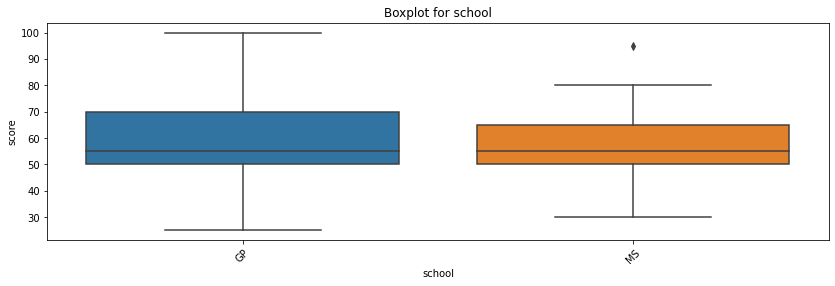

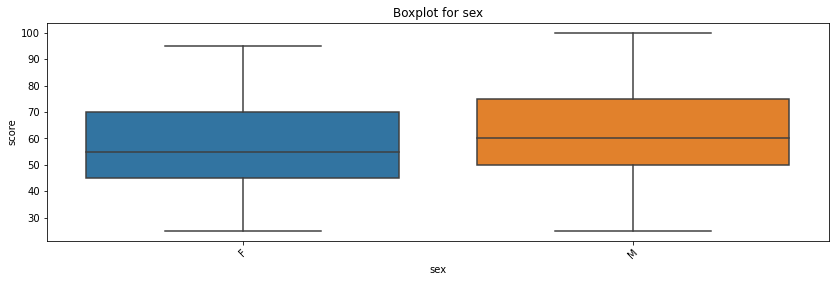

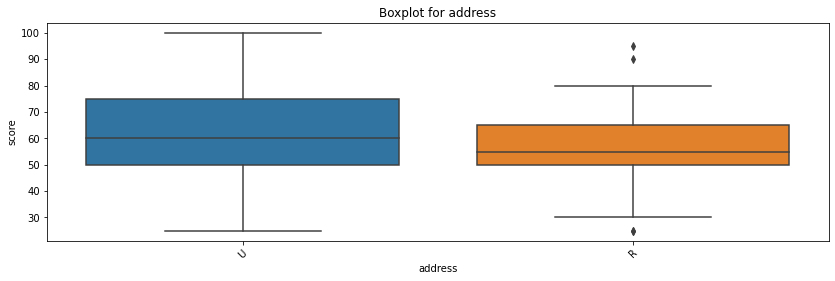

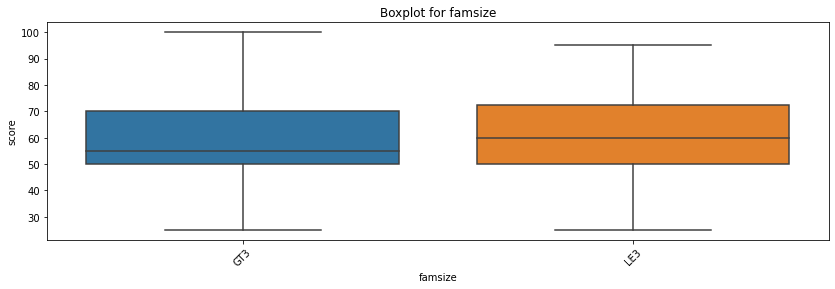

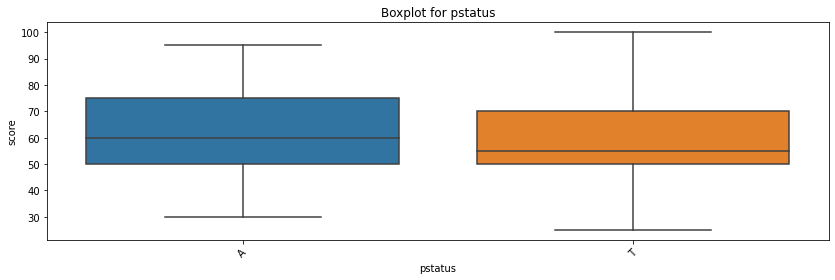

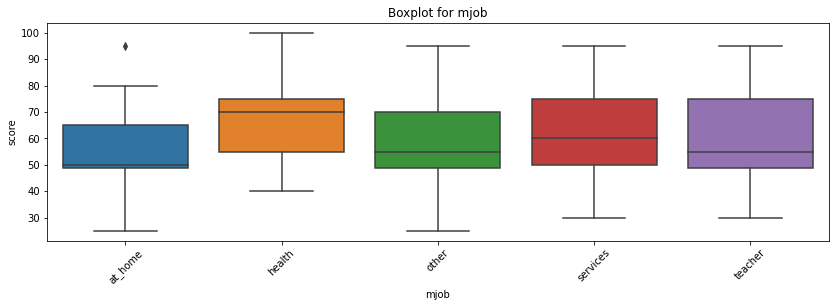

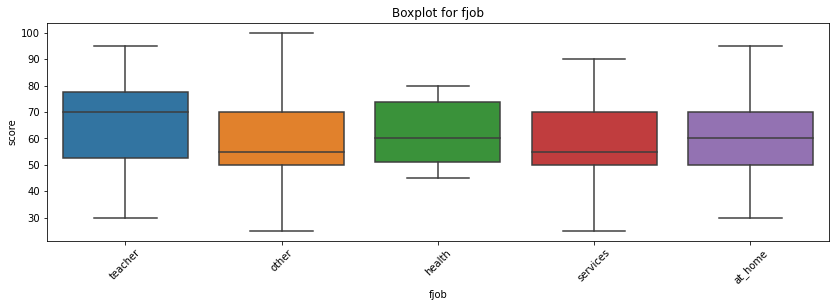

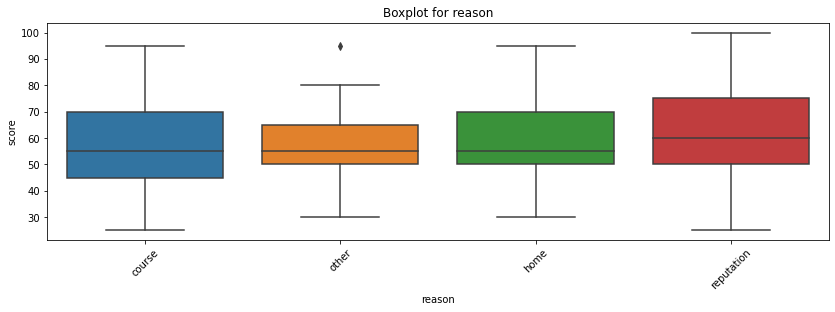

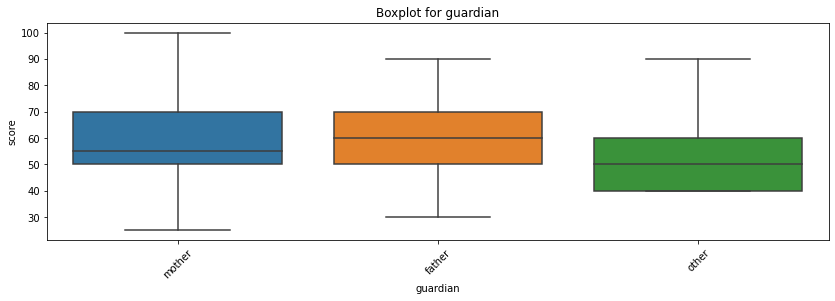

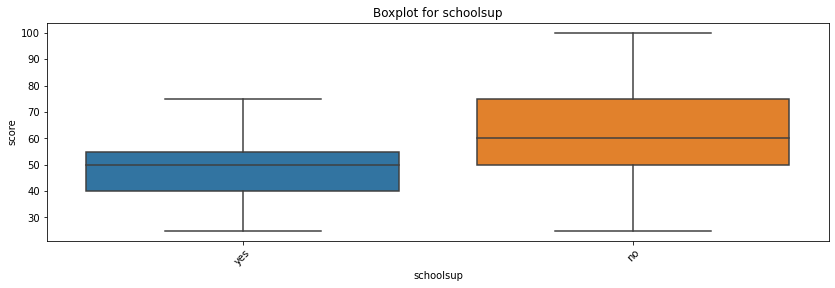

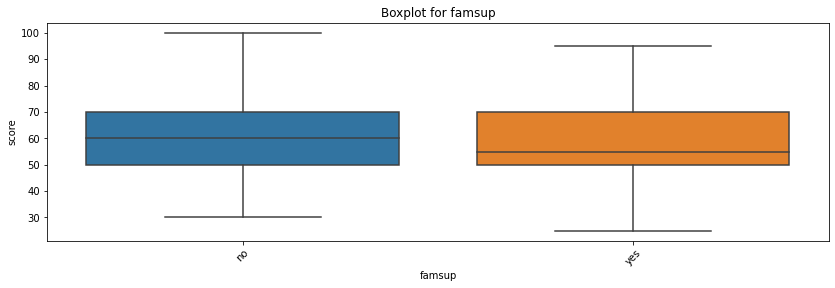

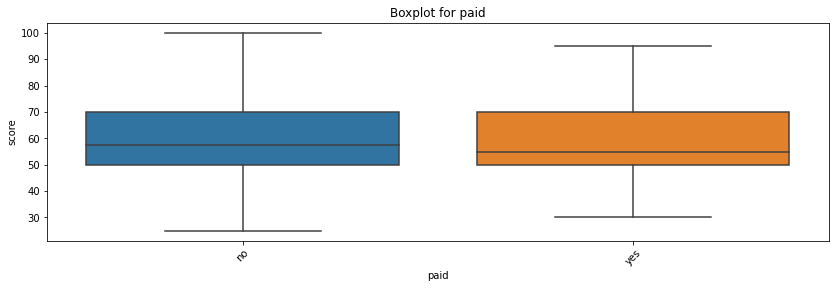

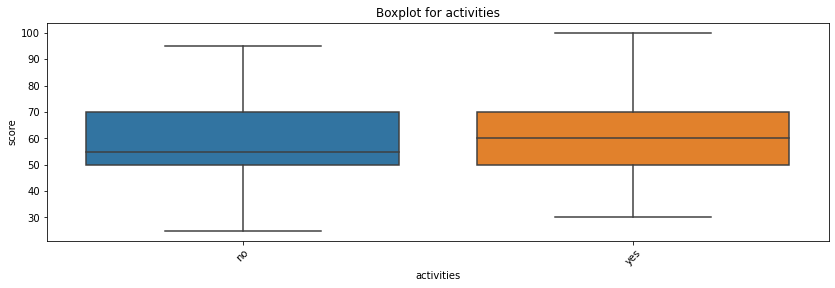

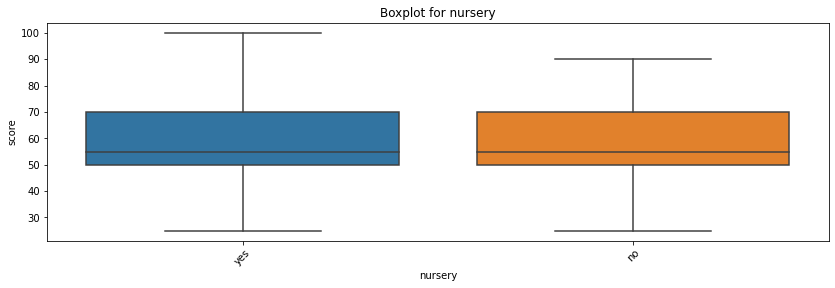

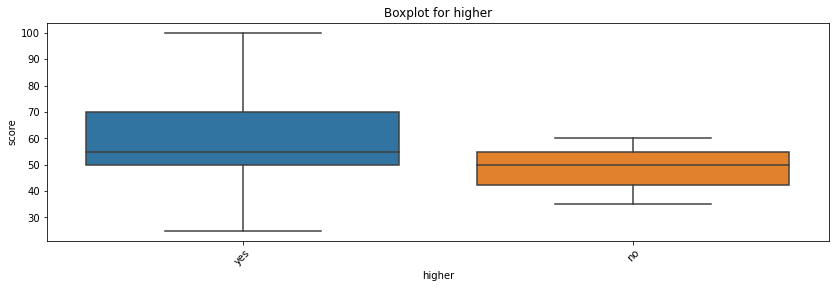

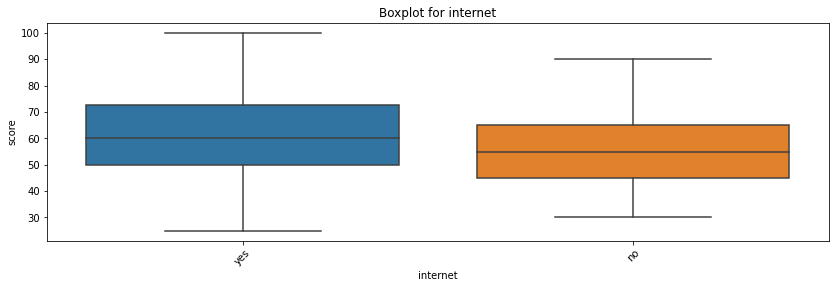

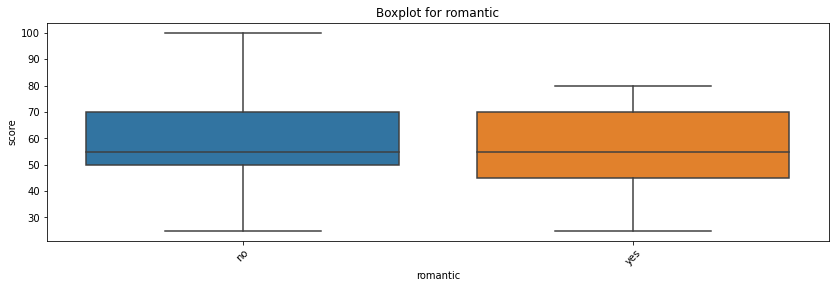

In [46]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
           'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [48]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
           'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup


Параметры, которые мы оставим для модели: текстовые "sex", "address", "mjob", "schoolsup" и все числовые, кроме "freetime"

In [49]:
study_for_model = study.loc[:, ['sex', 'address', 'mjob','schoolsup','age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'goout', 'health', 'absences' ]]
study_for_model.head()

,sex,address,mjob,schoolsup,age,medu,fedu,traveltime,studytime,failures,famrel,goout,health,absences
0,F,U,at_home,yes,18,4.0,4.0,2.0,2.0,0.0,4.0,4.0,3.0,6.0
1,F,U,at_home,no,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,4.0
2,F,U,at_home,yes,15,1.0,1.0,1.0,2.0,3.0,4.0,2.0,3.0,10.0
3,F,U,health,no,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,5.0,2.0
4,F,U,other,no,16,3.0,3.0,1.0,2.0,0.0,4.0,2.0,5.0,4.0


Выбросов немного, основная проблема датасета-отсутствие данных по некоторым переменным, из-за чего приходится делать допущения, которые могут оказаться неверными.
Основное допущение, что 0 баллов в 100-бальном тесте набрать нельзя, а значит ученик на него не пришел.

Положительная корреляция с итоговой оценкой наблюдается у следующих параметров: образование родителей, (причем образование матери коррелирует с оценкой сильнее образования отца), время на учёбу помимо школы и отношения в семье
Отрицательная корреляция: дорога до школы, возраст, здоровье
Самая сильная отрицательная корреляция: количество внеучебных неудач, время с друзьями и количество пропущенных занятий. Такие ученики находятся в группе риска неудовлетворительной оценки